# Explore here

In [2]:
import pandas as pd

# Cargar el dataset
file_path = '../data/raw/diabetes.csv'
df = pd.read_csv(file_path)

# Análisis descriptivo básico
shape = df.shape
info = df.info()
describe = df.describe()

(shape, info, describe)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


((768, 9),
 None,
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
 count   768.000000  768.000000     768.000000     768.000000  768.000000   
 mean      3.845052  120.894531      69.105469      20.536458   79.799479   
 std       3.369578   31.972618      19.355807      15.952218  115.244002   
 min       0.000000    0.000000       0.000000       0.000000    0.000000   
 25%       1.000000   99.000000      62.000000       0.000000    0.000000   
 50%       3.000000  117.000000      72.000000      23.000000   30.500000   
 75%       6.000000  140.250000      80.000000      32.000000  127.250000   
 max      17.000000  199.000000     122.000000      99.000000  846.000000   
 
               BMI  DiabetesPedigreeFunction         Age     Outcome  
 count  768.000000                768.000000  768.000000  768.000000  
 mean    31.992578                  0.471876   33.240885    0.348958  
 std      7.884160                  0.331329   11.760232    0.476951  
 mi

In [4]:
# Buscar y eliminar filas duplicadas
duplicados = df.duplicated().sum()
print(f"Cantidad de filas duplicadas: {duplicados}")

# Si hay duplicados, eliminarlos
if duplicados > 0:
    df = df.drop_duplicates()
    print(f"Duplicados eliminados. Ahora el dataset tiene {df.shape[0]} filas.")

# Revisar si hay valores nulos
print("\nCantidad de valores nulos por columna:")
print(df.isnull().sum())



Cantidad de filas duplicadas: 0

Cantidad de valores nulos por columna:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


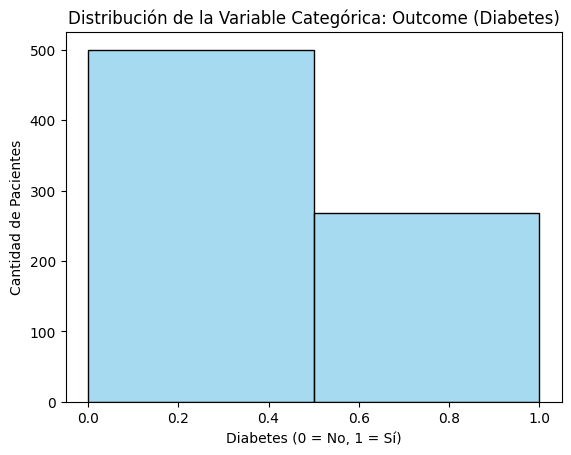

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Graficar la distribución de la variable categórica "Outcome"
sns.histplot(df['Outcome'], kde=False, bins=2, color='skyblue')
plt.title('Distribución de la Variable Categórica: Outcome (Diabetes)')
plt.xlabel('Diabetes (0 = No, 1 = Sí)')
plt.ylabel('Cantidad de Pacientes')
plt.show()

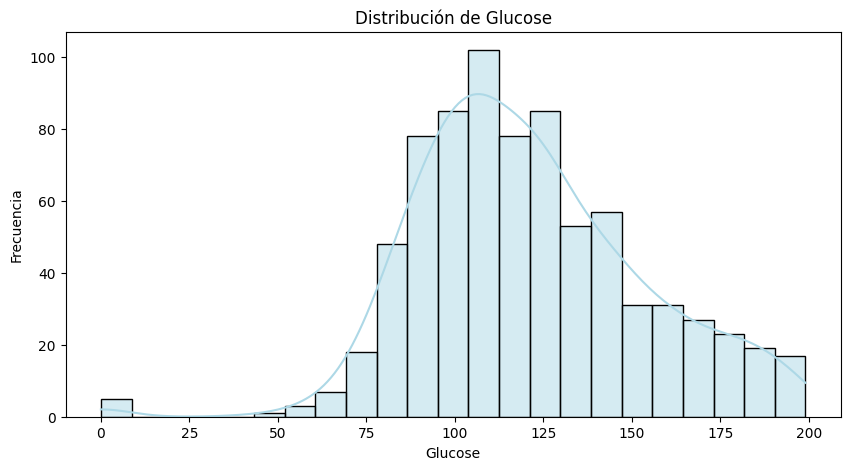

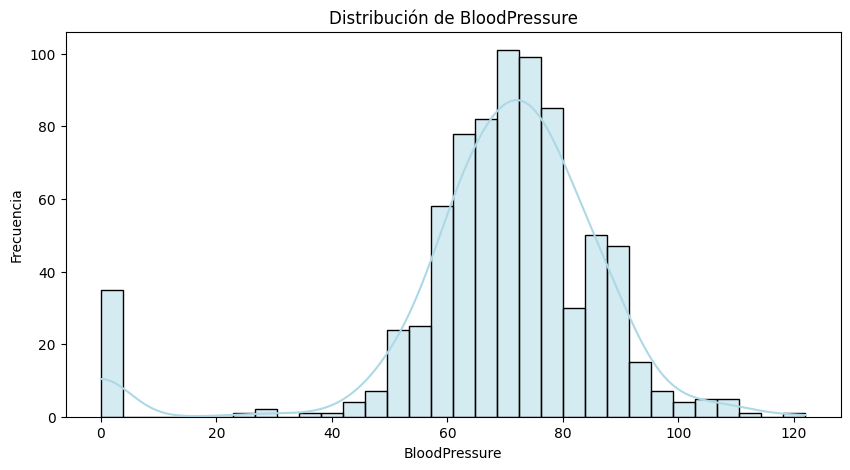

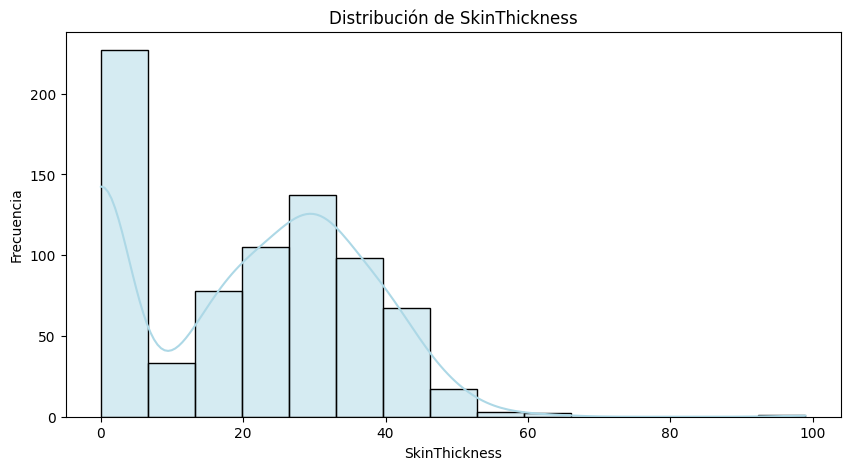

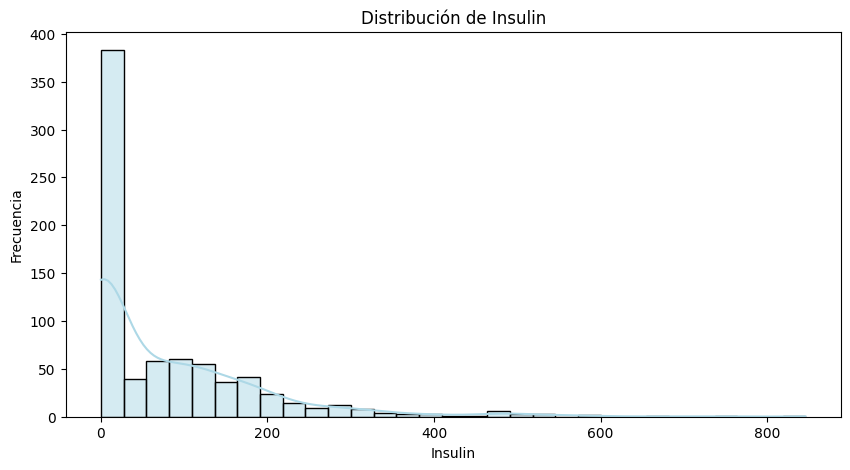

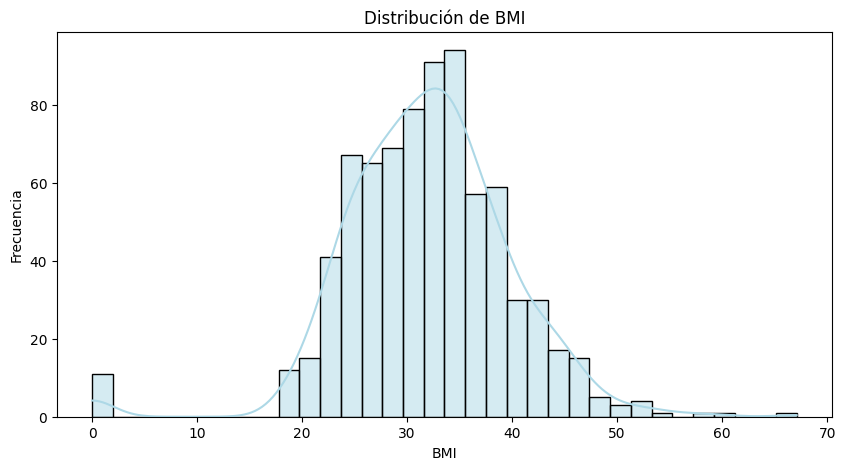

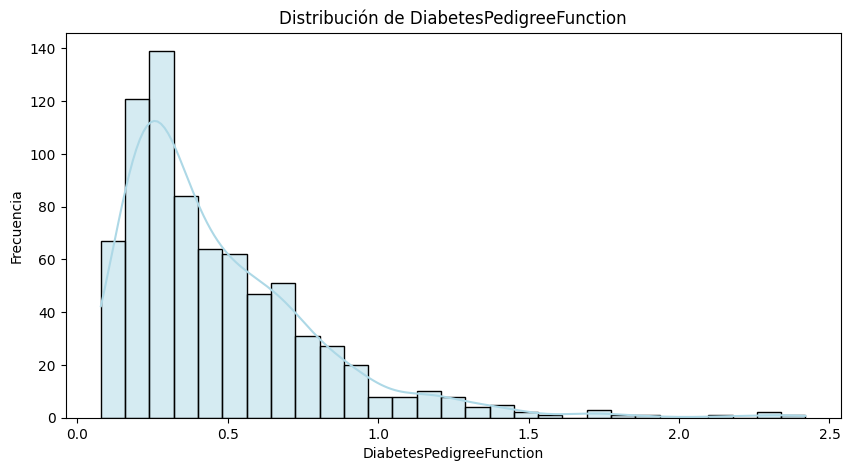

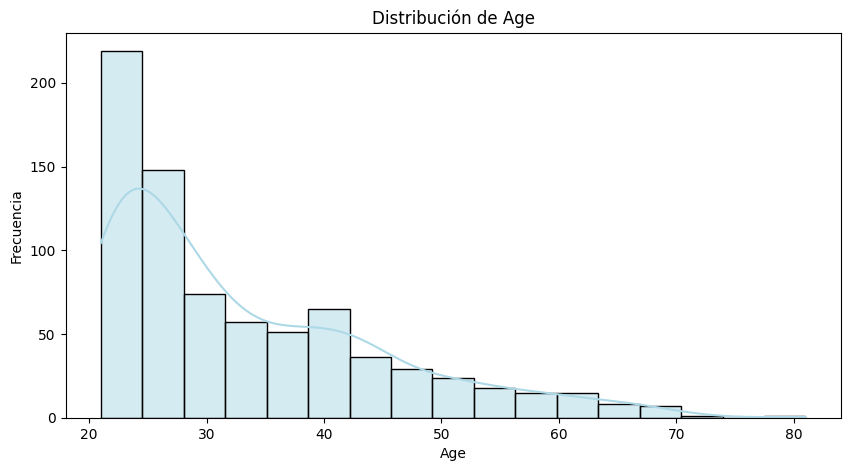

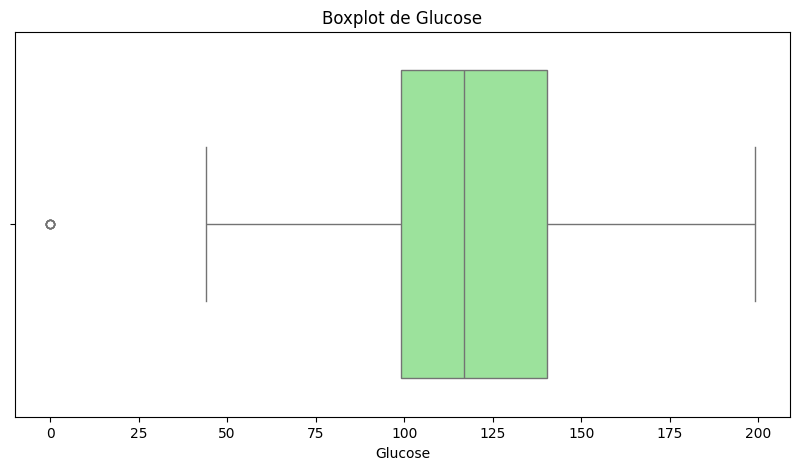

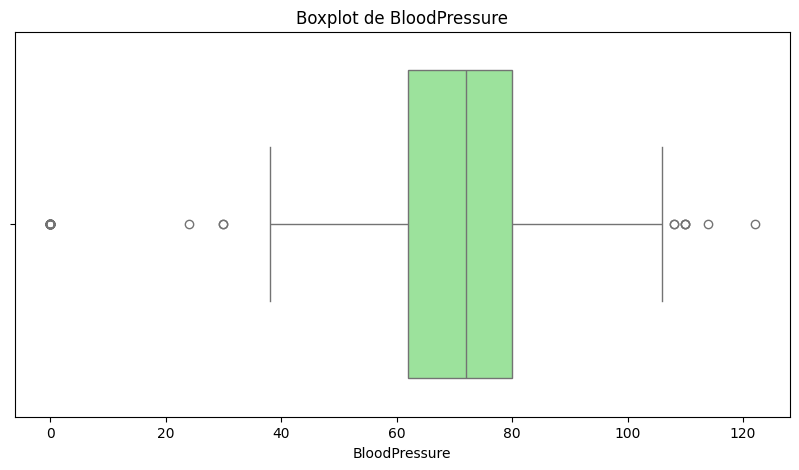

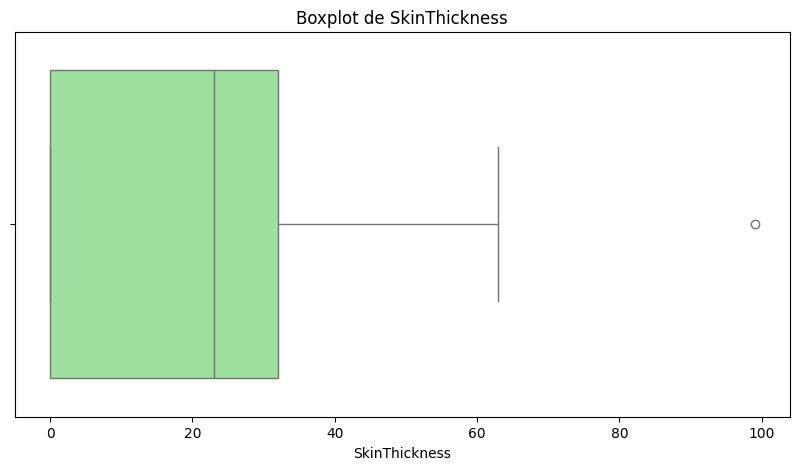

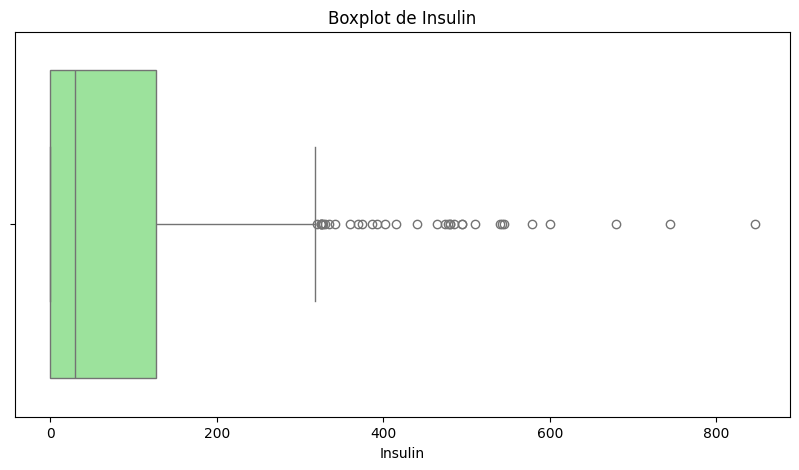

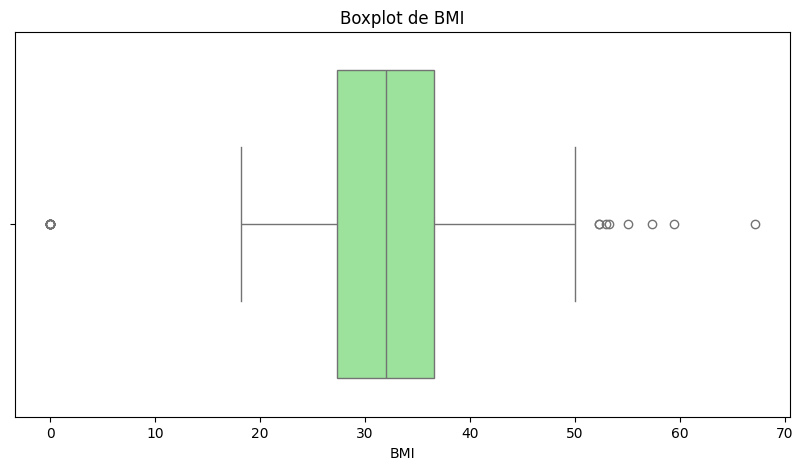

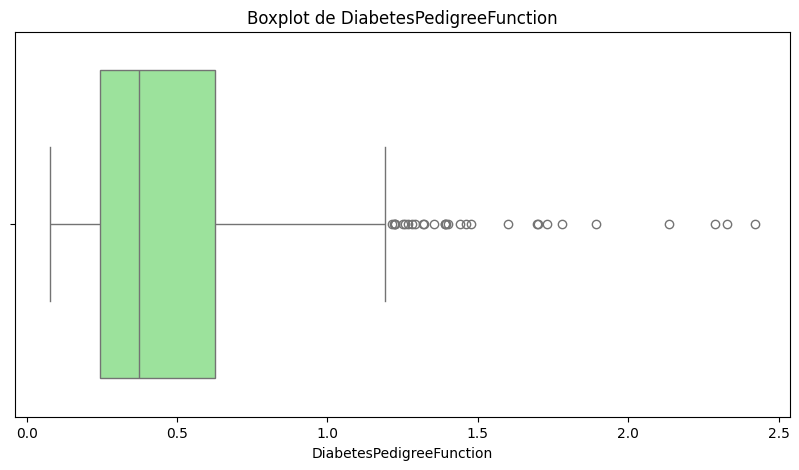

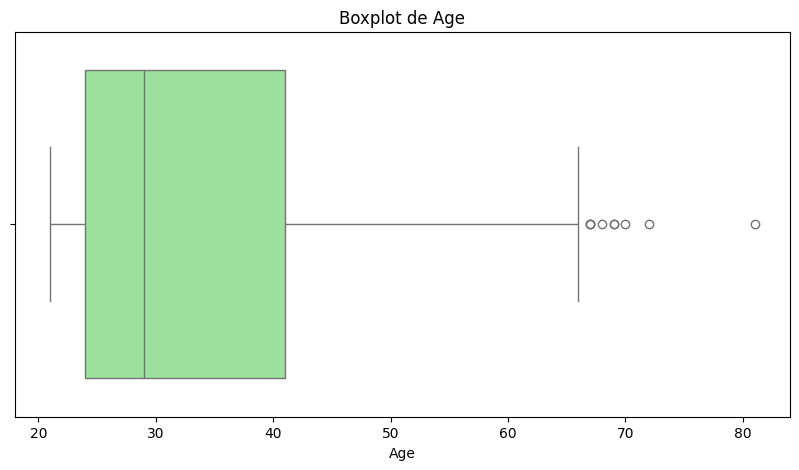

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Graficar histogramas para las variables numéricas
numerical_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True, color='lightblue')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

# Graficar boxplots para identificar outliers
for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    plt.show()

Outliers

In [10]:
# Identificar posibles outliers usando el rango intercuartílico (IQR)
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar outliers
outliers = (df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)

# Mostrar el número de outliers por columna
print("Número de outliers por columna:")
print(outliers.sum())

print(df.shape)

Número de outliers por columna:
Glucose                      5
BloodPressure               45
SkinThickness                1
Insulin                     34
BMI                         19
DiabetesPedigreeFunction    29
Age                          9
dtype: int64
(768, 9)


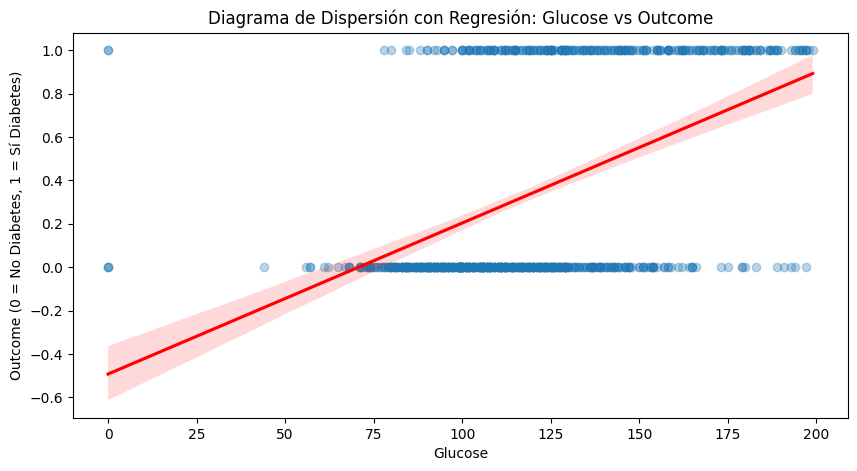

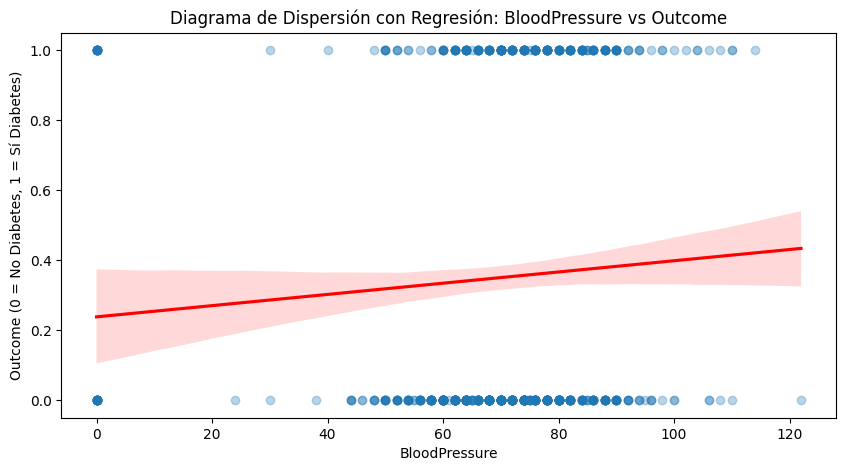

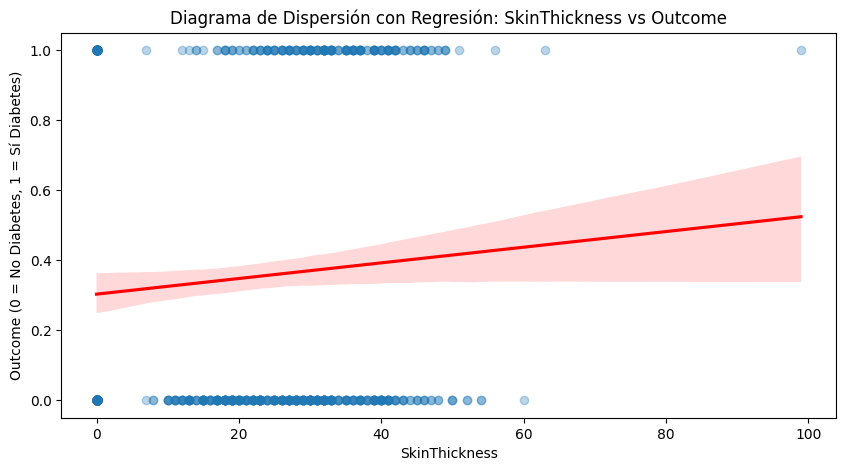

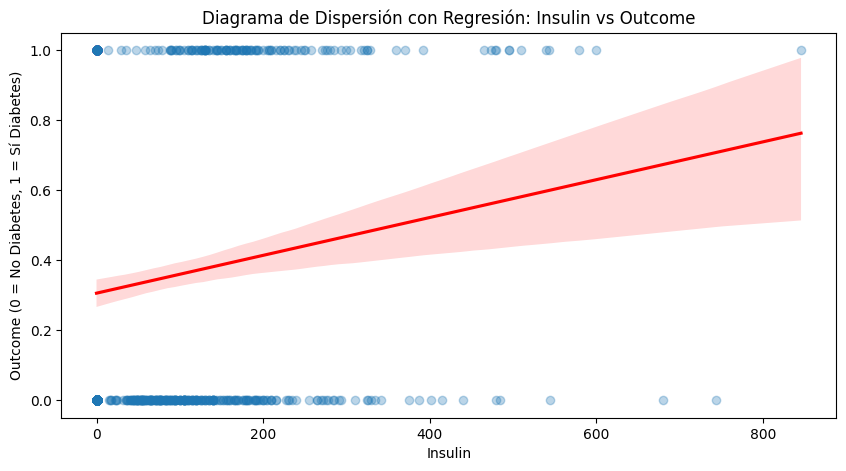

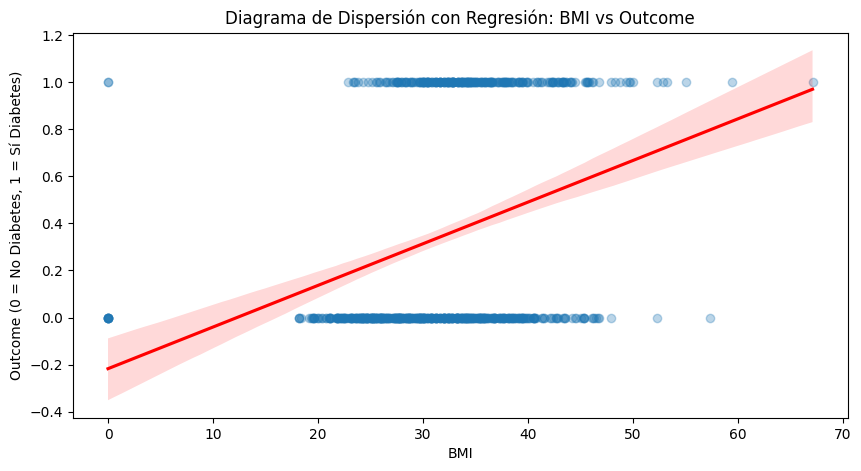

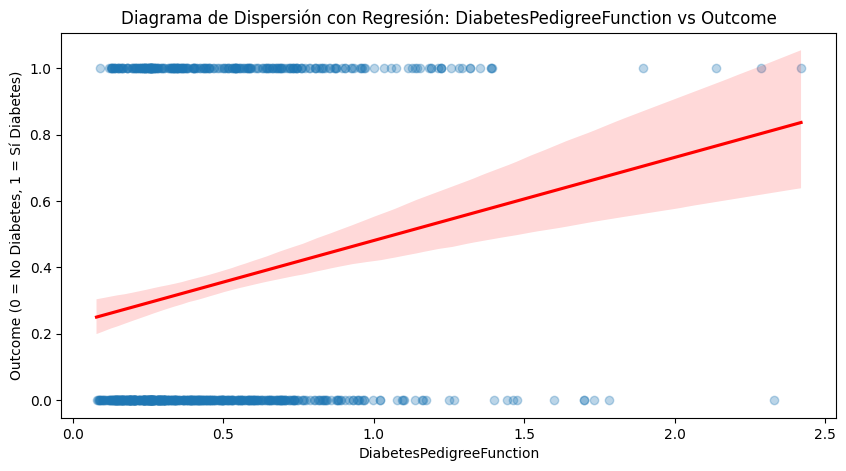

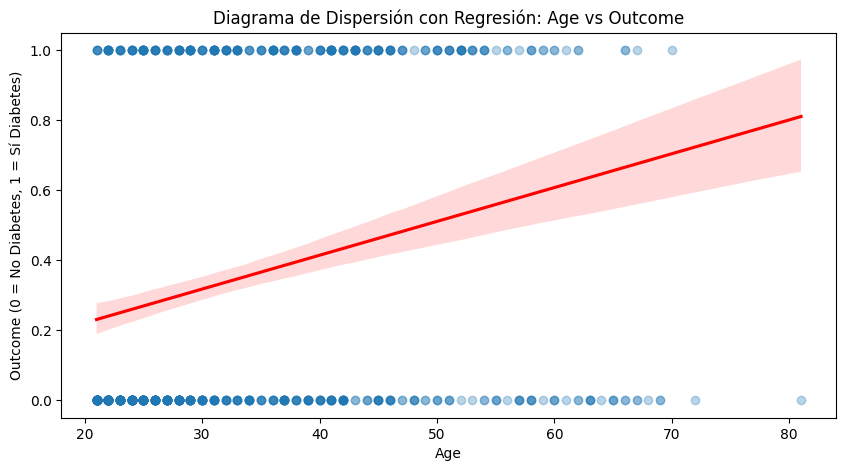

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables numéricas a analizar
numerical_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Diagramas de dispersión con línea de regresión para cada variable numérica vs. Outcome
for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.regplot(x=df[col], y=df['Outcome'], line_kws={'color': 'red'}, scatter_kws={'alpha': 0.3})
    plt.title(f'Diagrama de Dispersión con Regresión: {col} vs Outcome')
    plt.xlabel(col)
    plt.ylabel('Outcome (0 = No Diabetes, 1 = Sí Diabetes)')
    plt.show()

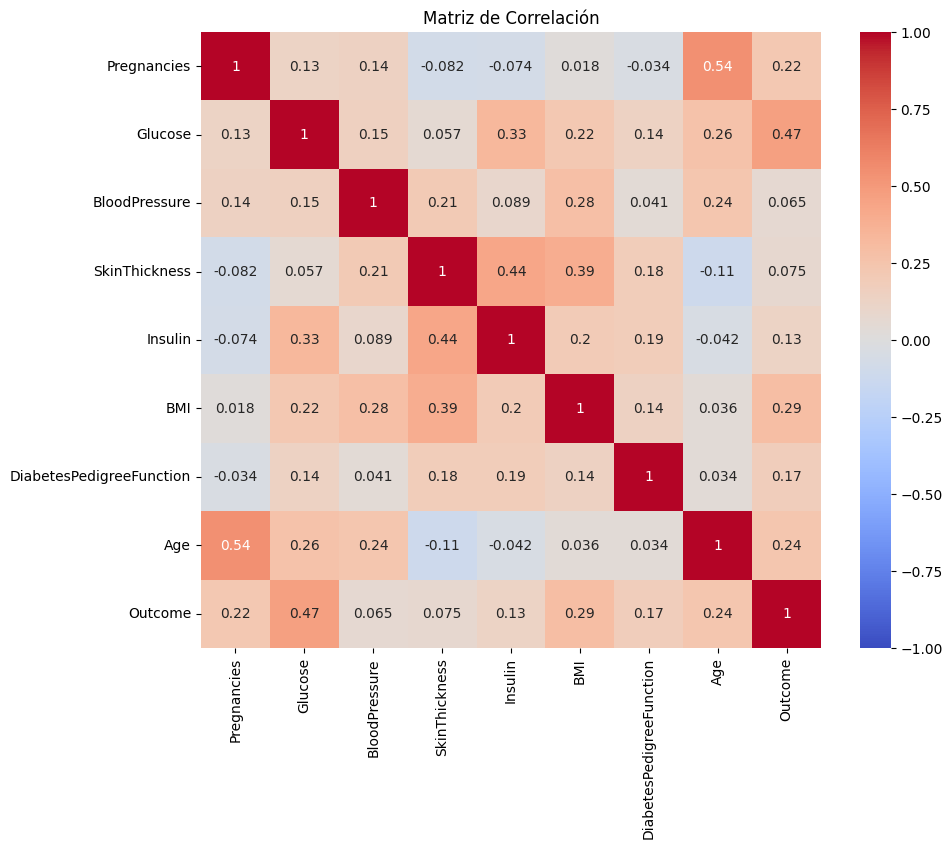

In [19]:
# Matriz de correlación
corr_matrix = df.corr()

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

Vamos a considerar la variable "Age" (edad) como un ejemplo. Aunque es numérica, podemos agruparla en categorías como "Joven", "Mediana Edad" y "Mayor".

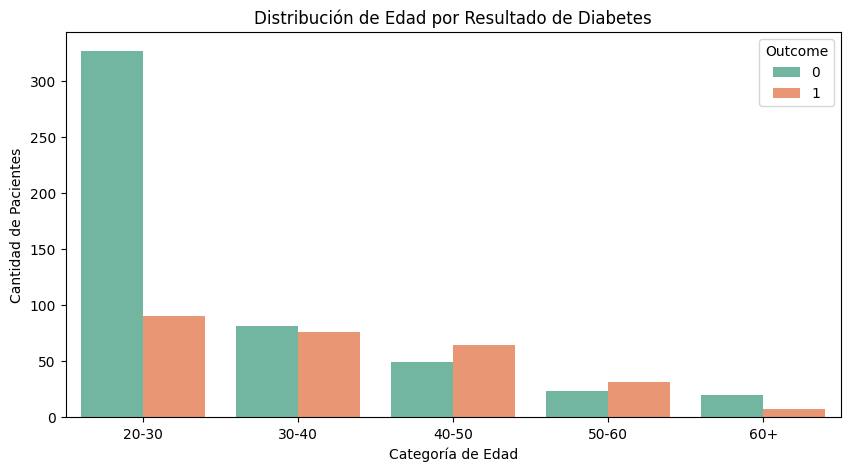

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Crear categorías para la edad
df['Age_Category'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 100], labels=['20-30', '30-40', '40-50', '50-60', '60+'])

# Graficar la relación entre la categoría de edad y el Outcome
plt.figure(figsize=(10, 5))
sns.countplot(x='Age_Category', hue='Outcome', data=df, palette='Set2')
plt.title('Distribución de Edad por Resultado de Diabetes')
plt.xlabel('Categoría de Edad')
plt.ylabel('Cantidad de Pacientes')
plt.show()

Vamos a codificar esto.


In [21]:
# Crear la variable categórica para edad
df['Age_Category'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 100], labels=['20-30', '30-40', '40-50', '50-60', '60+'])

# Aplicar One-Hot Encoding a la variable categórica
df_encoded = pd.get_dummies(df, columns=['Age_Category'], drop_first=True)

# Mostrar las primeras filas del dataframe con las nuevas columnas codificadas
print(df_encoded.head())

# Definir el dataframe final para el modelo
df_final = df_encoded.copy()

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  Age_Category_30-40  \
0                     0.627   50        1               False   
1                     0.351   31        0                True   
2                     0.672   32        1                True   
3                     0.167   21        0               False   
4                     2.288   33        1                True   

   Age_Category_40-50  Age_Category_50-60  Age_Category_60+  
0                True               False             False  
1               False               False           

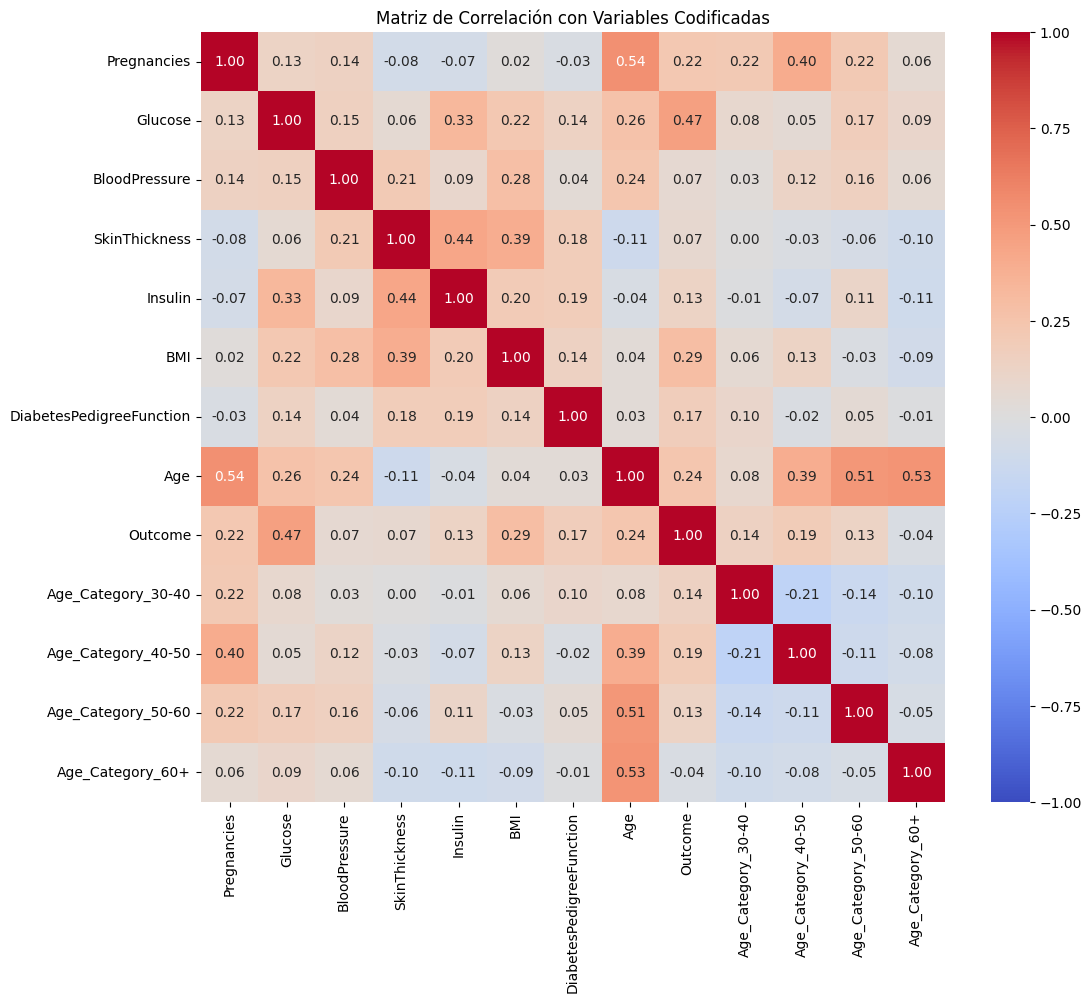

Correlaciones fuertes entre variables (>= 0.8):
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome, Age_Category_30-40, Age_Category_40-50, Age_Category_50-60, Age_Category_60+]
Index: []


In [22]:
# Calcular la nueva matriz de correlación
corr_matrix = df_encoded.corr()

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title('Matriz de Correlación con Variables Codificadas')
plt.show()

# Análisis de correlaciones fuertes
strong_corr = corr_matrix[(corr_matrix >= 0.8) & (corr_matrix != 1.0)]
print("Correlaciones fuertes entre variables (>= 0.8):")
print(strong_corr.dropna(how='all'))

In [23]:
# Seleccionar las columnas relevantes para el modelo
features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age_Category_30-40', 'Age_Category_40-50', 'Age_Category_50-60', 'Age_Category_60+']

# Definir la variable objetivo
target = 'Outcome'

# Crear el dataframe final con las características seleccionadas
df_final = df_encoded[features + [target]]

# Mostrar la estructura del dataframe final
print("Estructura del dataframe final para el modelo:")
print(df_final.head())
print(f"\nDimensiones del dataframe final: {df_final.shape}")

Estructura del dataframe final para el modelo:
   Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0      148             72             35        0  33.6   
1       85             66             29        0  26.6   
2      183             64              0        0  23.3   
3       89             66             23       94  28.1   
4      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age_Category_30-40  Age_Category_40-50  \
0                     0.627               False                True   
1                     0.351                True               False   
2                     0.672                True               False   
3                     0.167               False               False   
4                     2.288                True               False   

   Age_Category_50-60  Age_Category_60+  Outcome  
0               False             False        1  
1               False             False        0  
2               Fa

Precisión del modelo: 0.67

Matriz de confusión:
[[72 27]
 [24 31]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.75      0.73      0.74        99
           1       0.53      0.56      0.55        55

    accuracy                           0.67       154
   macro avg       0.64      0.65      0.64       154
weighted avg       0.67      0.67      0.67       154



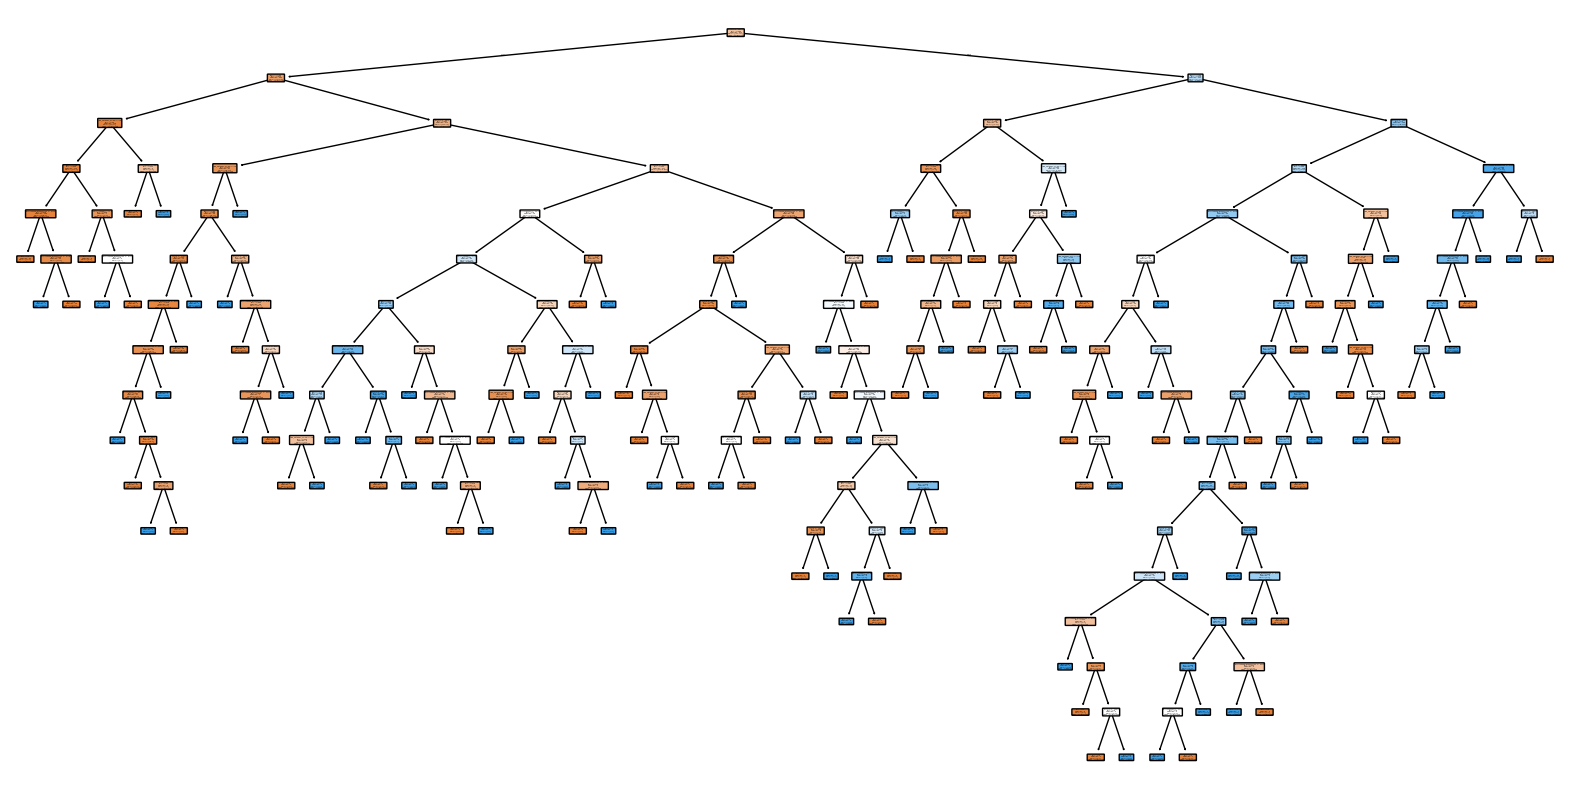

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn import tree

# Definir las características (X) y la variable objetivo (y)
X = df_final.drop(columns=['Outcome'])
y = df_final['Outcome']

# Dividir el dataset en entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Precisión del modelo: {accuracy:.2f}")
print("\nMatriz de confusión:")
print(conf_matrix)
print("\nReporte de clasificación:")
print(class_report)

# Visualizar el árbol de decisión
plt.figure(figsize=(20,10))
tree.plot_tree(model, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True, rounded=True)
plt.show()

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Definir el modelo base
model = DecisionTreeClassifier(random_state=42)

# Definir los hiperparámetros a probar
param_grid = {
    'max_depth': [3, 5, 7, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Entrenar usando GridSearch
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
print("Mejores hiperparámetros:")
print(grid_search.best_params_)

# Evaluar el modelo optimizado en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred_optimized = best_model.predict(X_test)

# Evaluación del modelo optimizado
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
conf_matrix_optimized = confusion_matrix(y_test, y_pred_optimized)
class_report_optimized = classification_report(y_test, y_pred_optimized)

print(f"Precisión del modelo optimizado: {accuracy_optimized:.2f}")
print("\nMatriz de confusión del modelo optimizado:")
print(conf_matrix_optimized)
print("\nReporte de clasificación del modelo optimizado:")
print(class_report_optimized)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Mejores hiperparámetros:
{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Precisión del modelo optimizado: 0.77

Matriz de confusión del modelo optimizado:
[[86 13]
 [22 33]]

Reporte de clasificación del modelo optimizado:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        99
           1       0.72      0.60      0.65        55

    accuracy                           0.77       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154

